In [1]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# !------------ 1 - Data Loading and Preperation -----------!

In [45]:
cesnet_tls22_df = pd.read_csv('D:/Data Science/Fiverr_Materials_Projects/Haaz_SaudiArabia/Order-2/Dataset-2_CESNET-TLS22/W-2021-41/7_Sun/flows-20211017.csv/flows-20211017.csv')

cesnet_tls22_df

,ID,BYTES,BYTES_REV,PACKETS,PACKETS_REV,DURATION,PPI,PPI_LEN,PPI_DURATION,PPI_ROUNDTRIPS,...,FLAG_ACK,FLAG_ACK_REV,FLAG_PSH,FLAG_PSH_REV,FLAG_RST,FLAG_RST_REV,FLAG_SYN,FLAG_SYN_REV,FLAG_FIN,FLAG_FIN_REV
0,136435926,19504,9425,26,23,2.685075,"[[0, 128, 0, 0, 0, 486, 437, 13, 128, 9, 1, 27...",29,2.373,5,...,1,1,1,1,0,0,1,1,1,1
1,136435927,2891,5522,17,19,65.644875,"[[0, 121, 0, 0, 0, 1, 0, 2, 121, 0, 2, 0, 152,...",15,65.399,3,...,1,1,1,1,0,0,1,1,1,1
2,136435928,2586,4577,13,13,0.243655,"[[0, 27, 0, 0, 11, 26, 0, 13, 1, 0, 0, 26, 65,...",14,0.204,3,...,1,1,1,1,1,0,1,1,1,1
3,136435929,1567,2232,12,13,0.125484,"[[0, 1, 13, 27, 0, 5, 1, 1, 5, 43, 0], [1, -1,...",11,0.096,4,...,1,1,1,1,1,0,1,1,0,1
4,136435930,1940,1585,7,6,0.194700,"[[0, 21, 2, 75, 24, 0, 0], [1, -1, 1, 1, -1, -...",7,0.122,2,...,1,1,1,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5284739,141720665,1249,7224,8,11,0.197198,"[[0, 0, 0, 0, 1, 10, 9, 0, 9, 105], [1, -1, -1...",10,0.134,3,...,1,1,1,1,0,0,1,1,0,0
5284740,141720666,25420,3221,39,31,20.055317,"[[0, 1, 5, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",30,0.016,4,...,1,1,1,1,0,0,1,1,1,1
5284741,141720667,1221,8603,11,9,0.165922,"[[0, 18, 0, 0, 0, 54, 0, 23, 3], [1, -1, -1, -...",9,0.098,2,...,1,1,1,1,0,0,1,1,0,0
5284742,141720668,2250,4282,8,9,0.655006,"[[0, 106, 0, 0, 13, 105, 4, 152, 106], [1, -1,...",9,0.486,3,...,1,1,1,1,0,0,1,1,0,0


In [47]:
cesnet_tls22_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5284744 entries, 0 to 5284743
Data columns (total 30 columns):
 #   Column          Dtype  
---  ------          -----  
 0   ID              int64  
 1   BYTES           int64  
 2   BYTES_REV       int64  
 3   PACKETS         int64  
 4   PACKETS_REV     int64  
 5   DURATION        float64
 6   PPI             object 
 7   PPI_LEN         int64  
 8   PPI_DURATION    float64
 9   PPI_ROUNDTRIPS  int64  
 10  APP             object 
 11  CATEGORY        object 
 12  TCP_FLAGS       int64  
 13  TCP_FLAGS_REV   int64  
 14  FLAG_CWR        int64  
 15  FLAG_CWR_REV    int64  
 16  FLAG_ECE        int64  
 17  FLAG_ECE_REV    int64  
 18  FLAG_URG        int64  
 19  FLAG_URG_REV    int64  
 20  FLAG_ACK        int64  
 21  FLAG_ACK_REV    int64  
 22  FLAG_PSH        int64  
 23  FLAG_PSH_REV    int64  
 24  FLAG_RST        int64  
 25  FLAG_RST_REV    int64  
 26  FLAG_SYN        int64  
 27  FLAG_SYN_REV    int64  
 28  FLAG_FIN    

In [49]:
print(cesnet_tls22_df['PPI'].value_counts())

PPI
[[0, 1, 0, 0, 8], [1, -1, -1, -1, 1], [182, 1460, 1460, 194, 7]]                                                                                                                                                                                                                                                                                                                                    3528
[[0, 6, 0, 0], [1, -1, -1, -1], [214, 1380, 1380, 1374]]                                                                                                                                                                                                                                                                                                                                            2684
[[0, 1, 0, 0, 8], [1, -1, -1, -1, 1], [182, 1460, 1460, 193, 7]]                                                                                                                                                  

In [50]:
cesnet_tls22_df.APP.value_counts()

APP
microsoft-diagnostic        255045
microsoft-settings          245503
microsoft-update            204789
microsoft-authentication    161638
teams                       147452
                             ...  
opera-notifications             18
adobe-search                     7
opera-weather                    3
opera-oauth2                     3
opera-autoupdate                 2
Name: count, Length: 186, dtype: int64

In [51]:
cesnet_tls22_df.CATEGORY.value_counts()

CATEGORY
Other services and APIs    641502
Streaming media            597000
Analytics & Telemetry      592770
Antivirus                  555531
Advertising                418292
File sharing               315284
Authentication services    313455
Videoconferencing          287554
Social                     248883
Search                     221924
Software updates           216542
Mail                       181142
Games                      146690
Information Systems        142818
Music                      140542
Notification services       96515
Instant messaging           80399
Weather services            53839
Remote Desktop              16836
Internet Banking            14953
Virtual assistant            2273
Name: count, dtype: int64

In [52]:
print(cesnet_tls22_df.head(10))  # Print the first 10 rows

          ID  BYTES  BYTES_REV  PACKETS  PACKETS_REV   DURATION  \
0  136435926  19504       9425       26           23   2.685075   
1  136435927   2891       5522       17           19  65.644875   
2  136435928   2586       4577       13           13   0.243655   
3  136435929   1567       2232       12           13   0.125484   
4  136435930   1940       1585        7            6   0.194700   
5  136435931   6886       8643       18           19   0.840930   
6  136435932   3435     170295       71          133   0.047022   
7  136435933   1801       1980       12           11   3.342587   
8  136435934   1974       6020        9           11   0.082038   
9  136435935   3639       6912       13           13   0.200498   

                                                 PPI  PPI_LEN  PPI_DURATION  \
0  [[0, 128, 0, 0, 0, 486, 437, 13, 128, 9, 1, 27...       29         2.373   
1  [[0, 121, 0, 0, 0, 1, 0, 2, 121, 0, 2, 0, 152,...       15        65.399   
2  [[0, 27, 0, 0, 11, 26,

# !------------- 2. EDA - Exploratory Data Analysis ---------------------!
"""

In EDA we have first checked the length and shape of the dataset and we have found that the dataset have 16898 records with 22 columns in the original dataframe. 

But after doing data preperation, we have 24 columns.

After checking length and the columns we have checked the statistics of the data data and the corellation between each columns, and the results are shown below. 

After that we have checked the data-type of each columns to check categorical and numerical columns which will be helpfull in our Data Pre-processing step.  

"""

In [17]:
cesnet_tls22_df.head()

,ID,BYTES,BYTES_REV,PACKETS,PACKETS_REV,DURATION,PPI,PPI_LEN,PPI_DURATION,PPI_ROUNDTRIPS,...,FLAG_ACK,FLAG_ACK_REV,FLAG_PSH,FLAG_PSH_REV,FLAG_RST,FLAG_RST_REV,FLAG_SYN,FLAG_SYN_REV,FLAG_FIN,FLAG_FIN_REV
0,136435926,19504,9425,26,23,2.685075,"[[0, 128, 0, 0, 0, 486, 437, 13, 128, 9, 1, 27...",29,2.373,5,...,1,1,1,1,0,0,1,1,1,1
1,136435927,2891,5522,17,19,65.644875,"[[0, 121, 0, 0, 0, 1, 0, 2, 121, 0, 2, 0, 152,...",15,65.399,3,...,1,1,1,1,0,0,1,1,1,1
2,136435928,2586,4577,13,13,0.243655,"[[0, 27, 0, 0, 11, 26, 0, 13, 1, 0, 0, 26, 65,...",14,0.204,3,...,1,1,1,1,1,0,1,1,1,1
3,136435929,1567,2232,12,13,0.125484,"[[0, 1, 13, 27, 0, 5, 1, 1, 5, 43, 0], [1, -1,...",11,0.096,4,...,1,1,1,1,1,0,1,1,0,1
4,136435930,1940,1585,7,6,0.194700,"[[0, 21, 2, 75, 24, 0, 0], [1, -1, 1, 1, -1, -...",7,0.122,2,...,1,1,1,1,0,0,1,1,0,0


In [19]:
len(cesnet_tls22_df)

5284744

In [21]:
cesnet_tls22_df.shape

(5284744, 30)

In [23]:
cesnet_tls22_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5284744 entries, 0 to 5284743
Data columns (total 30 columns):
 #   Column          Dtype  
---  ------          -----  
 0   ID              int64  
 1   BYTES           int64  
 2   BYTES_REV       int64  
 3   PACKETS         int64  
 4   PACKETS_REV     int64  
 5   DURATION        float64
 6   PPI             object 
 7   PPI_LEN         int64  
 8   PPI_DURATION    float64
 9   PPI_ROUNDTRIPS  int64  
 10  APP             object 
 11  CATEGORY        object 
 12  TCP_FLAGS       int64  
 13  TCP_FLAGS_REV   int64  
 14  FLAG_CWR        int64  
 15  FLAG_CWR_REV    int64  
 16  FLAG_ECE        int64  
 17  FLAG_ECE_REV    int64  
 18  FLAG_URG        int64  
 19  FLAG_URG_REV    int64  
 20  FLAG_ACK        int64  
 21  FLAG_ACK_REV    int64  
 22  FLAG_PSH        int64  
 23  FLAG_PSH_REV    int64  
 24  FLAG_RST        int64  
 25  FLAG_RST_REV    int64  
 26  FLAG_SYN        int64  
 27  FLAG_SYN_REV    int64  
 28  FLAG_FIN    

# Analysing count of values in each object feature variable

In [27]:
print(cesnet_tls22_df['PPI'].value_counts())
print()

print(cesnet_tls22_df['APP'].value_counts())
print()


PPI
[[0, 1, 0, 0, 8], [1, -1, -1, -1, 1], [182, 1460, 1460, 194, 7]]                                                                                                                                                                                                                                                                                                                                    3528
[[0, 6, 0, 0], [1, -1, -1, -1], [214, 1380, 1380, 1374]]                                                                                                                                                                                                                                                                                                                                            2684
[[0, 1, 0, 0, 8], [1, -1, -1, -1, 1], [182, 1460, 1460, 193, 7]]                                                                                                                                                  

# Summary statistics

In [29]:
# 2. Exploratory Data Analysis (EDA)
summary_stats = cesnet_tls22_df.describe()

summary_stats

,ID,BYTES,BYTES_REV,PACKETS,PACKETS_REV,DURATION,PPI_LEN,PPI_DURATION,PPI_ROUNDTRIPS,TCP_FLAGS,...,FLAG_ACK,FLAG_ACK_REV,FLAG_PSH,FLAG_PSH_REV,FLAG_RST,FLAG_RST_REV,FLAG_SYN,FLAG_SYN_REV,FLAG_FIN,FLAG_FIN_REV
count,5.284744e+06,5.284744e+06,5.284744e+06,5.284744e+06,5.284744e+06,5.284744e+06,5.284744e+06,5.284744e+06,5.284744e+06,5.284744e+06,...,5284744.0,5.284744e+06,5.284744e+06,5.284744e+06,5.284744e+06,5.284744e+06,5.284744e+06,5.284744e+06,5.284744e+06,5.284744e+06
mean,1.390783e+08,2.621659e+04,2.085424e+05,7.527377e+01,1.635117e+02,7.300597e+00,1.516599e+01,3.519649e+00,3.127808e+00,3.900539e+01,...,1.0,9.999862e-01,9.999998e-01,9.998433e-01,1.988488e-01,6.099066e-02,9.999164e-01,9.997173e-01,5.677020e-01,5.991900e-01
std,1.525574e+06,5.527379e+06,6.629604e+06,3.994541e+03,4.609699e+03,2.874944e+01,7.712187e+00,1.845615e+01,1.317524e+00,4.595090e+01,...,0.0,3.716606e-03,4.349988e-04,1.251611e-02,3.991340e-01,2.393132e-01,9.144944e-03,1.681133e-02,4.953953e-01,4.900626e-01
min,1.364359e+08,2.240000e+02,4.000000e+01,1.000000e+00,1.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,...,1.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.377571e+08,1.521000e+03,4.311000e+03,1.000000e+01,9.000000e+00,1.631320e-01,1.000000e+01,7.900000e-02,2.000000e+00,2.600000e+01,...,1.0,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
50%,1.390783e+08,2.401000e+03,5.966000e+03,1.200000e+01,1.200000e+01,5.133740e-01,1.300000e+01,2.030000e-01,3.000000e+00,2.700000e+01,...,1.0,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
75%,1.403995e+08,4.327000e+03,9.170000e+03,1.700000e+01,1.800000e+01,3.906183e+00,1.900000e+01,5.910000e-01,3.000000e+00,2.700000e+01,...,1.0,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
max,1.417207e+08,5.409299e+09,7.778869e+09,3.672429e+06,5.191755e+06,3.281411e+02,3.000000e+01,3.247290e+02,1.500000e+01,2.230000e+02,...,1.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


# checking the number of missing values

In [31]:
cesnet_tls22_df.isnull().sum()

ID                0
BYTES             0
BYTES_REV         0
PACKETS           0
PACKETS_REV       0
DURATION          0
PPI               0
PPI_LEN           0
PPI_DURATION      0
PPI_ROUNDTRIPS    0
APP               0
CATEGORY          0
TCP_FLAGS         0
TCP_FLAGS_REV     0
FLAG_CWR          0
FLAG_CWR_REV      0
FLAG_ECE          0
FLAG_ECE_REV      0
FLAG_URG          0
FLAG_URG_REV      0
FLAG_ACK          0
FLAG_ACK_REV      0
FLAG_PSH          0
FLAG_PSH_REV      0
FLAG_RST          0
FLAG_RST_REV      0
FLAG_SYN          0
FLAG_SYN_REV      0
FLAG_FIN          0
FLAG_FIN_REV      0
dtype: int64

# Checking the distribution of the target variable

In [33]:
print(cesnet_tls22_df['CATEGORY'].value_counts())

CATEGORY
Other services and APIs    641502
Streaming media            597000
Analytics & Telemetry      592770
Antivirus                  555531
Advertising                418292
File sharing               315284
Authentication services    313455
Videoconferencing          287554
Social                     248883
Search                     221924
Software updates           216542
Mail                       181142
Games                      146690
Information Systems        142818
Music                      140542
Notification services       96515
Instant messaging           80399
Weather services            53839
Remote Desktop              16836
Internet Banking            14953
Virtual assistant            2273
Name: count, dtype: int64


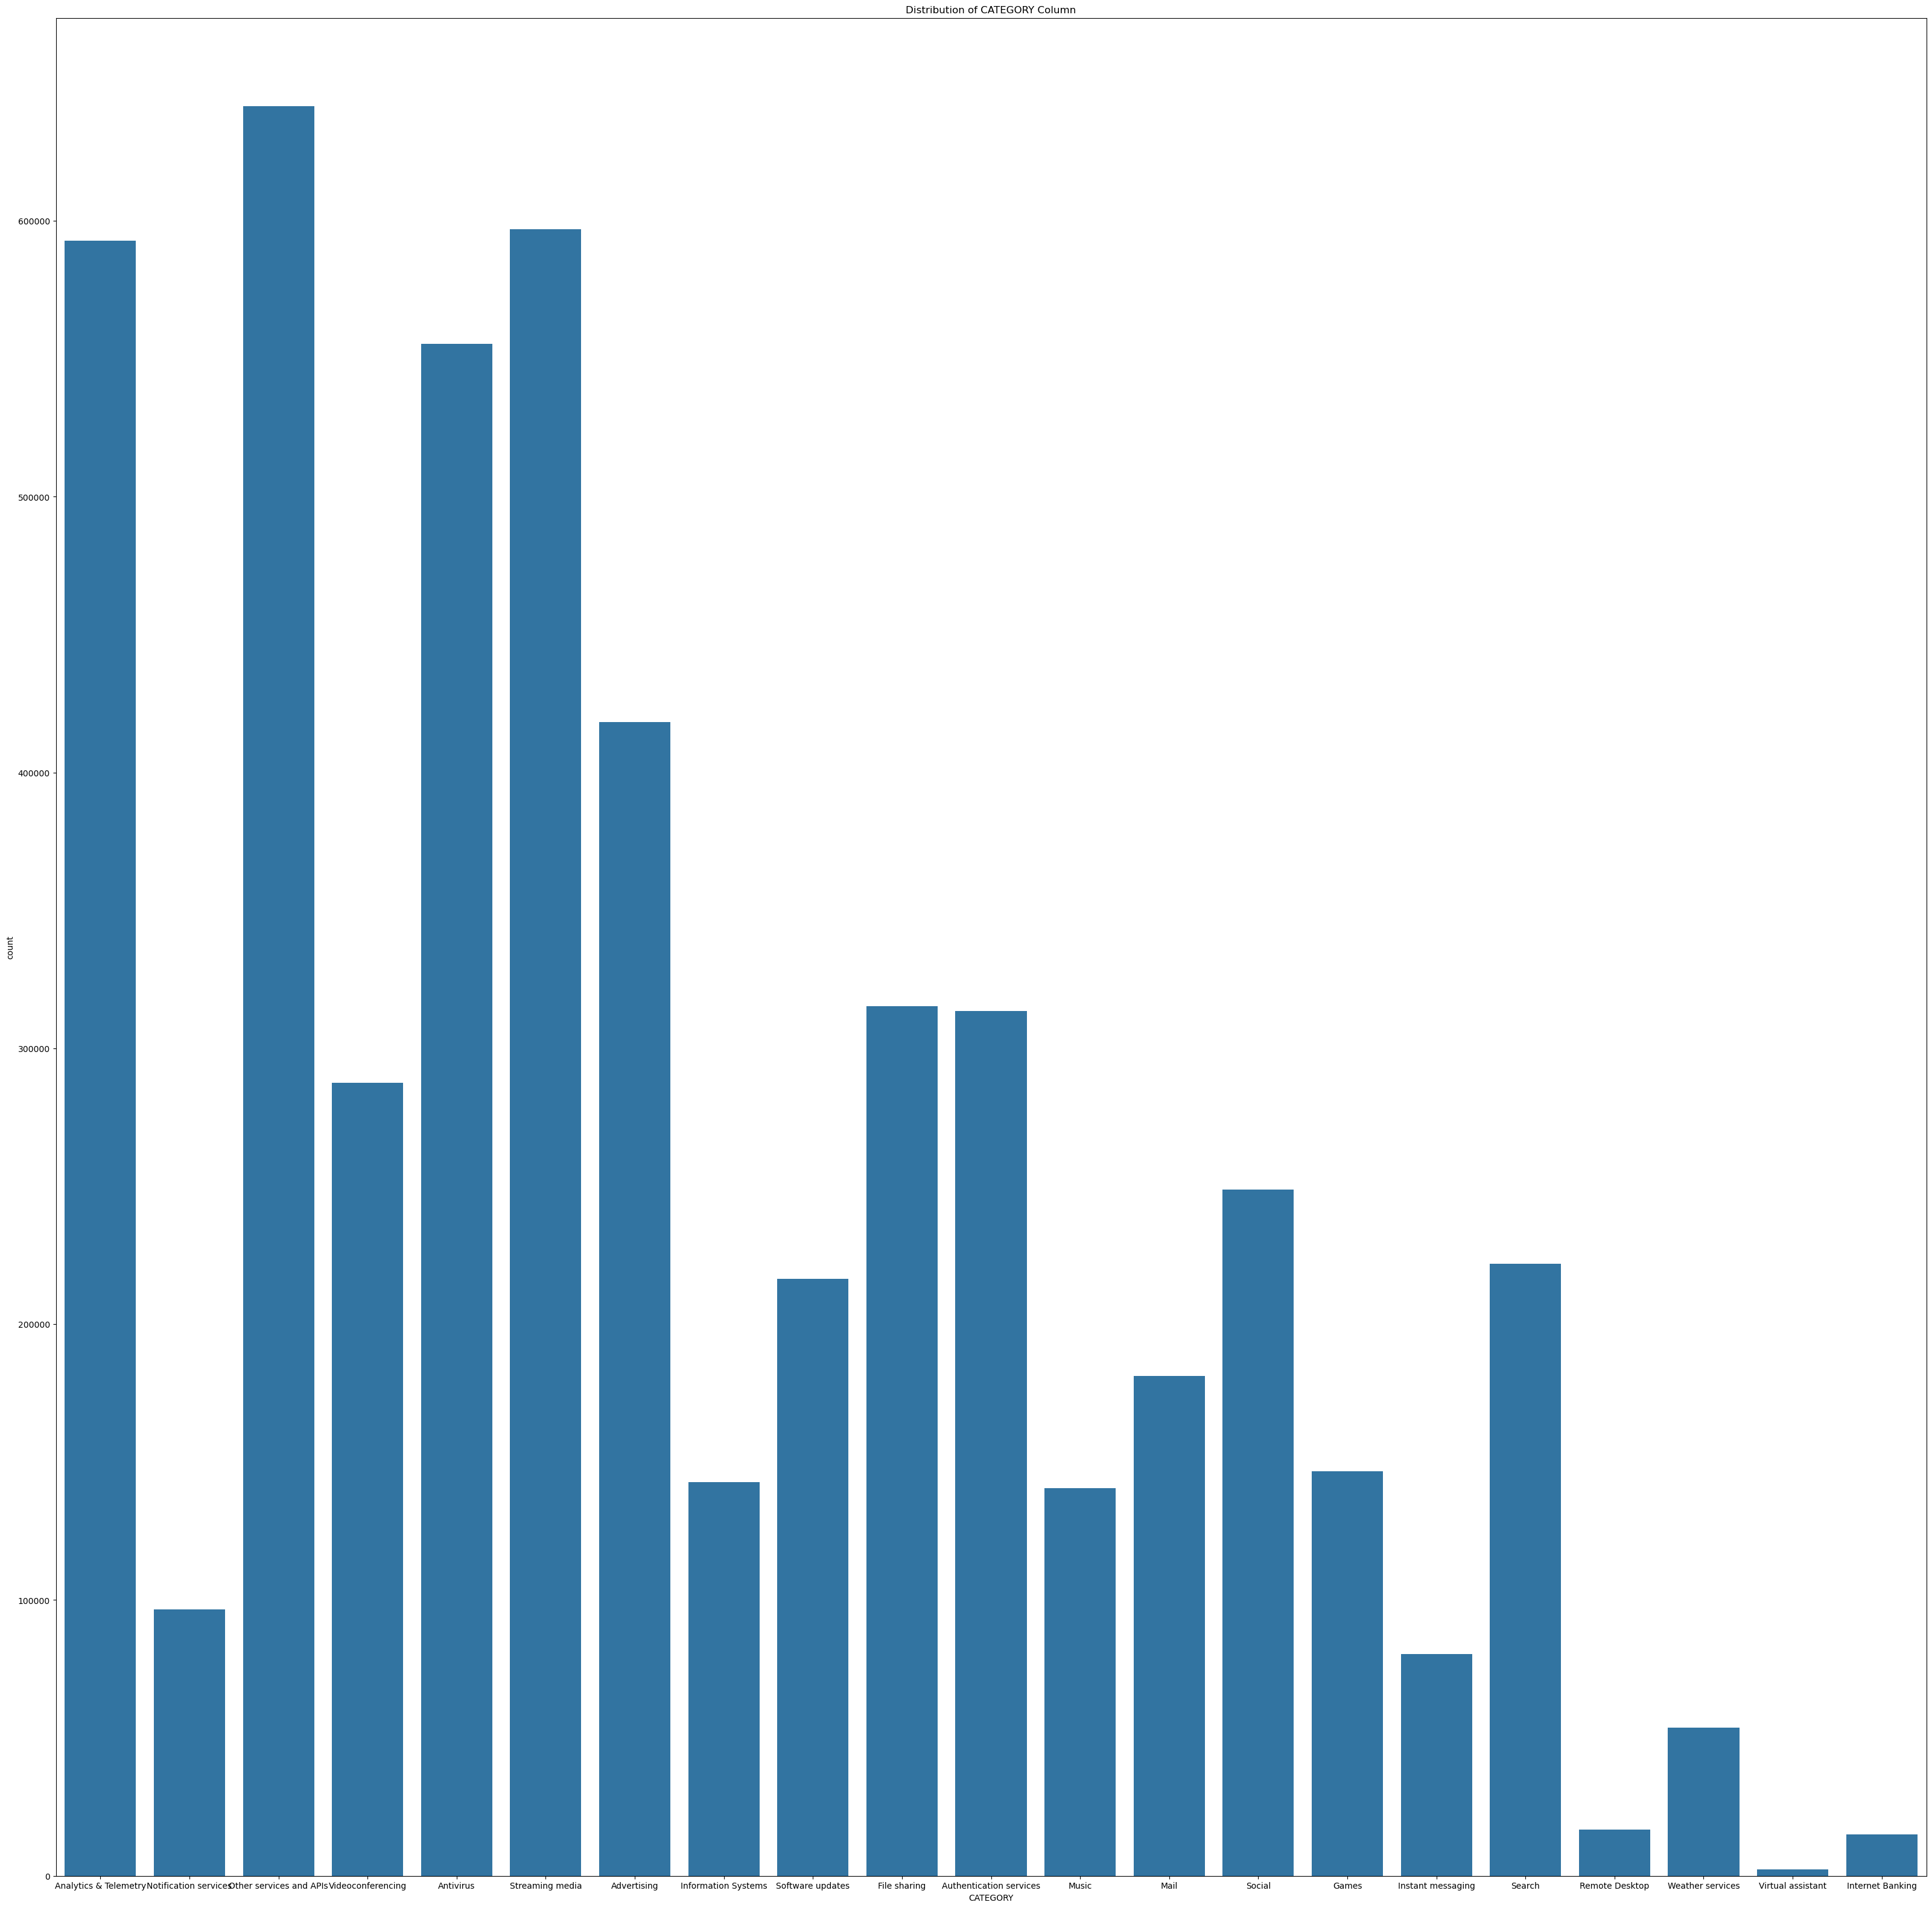

In [49]:
plt.figure(figsize=(40, 40))

sns.countplot(x='CATEGORY', data=cesnet_tls22_df)
plt.title('Distribution of CATEGORY Column')
plt.show()

# Here the resulting pair plot shows:

 - Each subplot along the diagonal represents the distribution of a specific feature, with two overlaid histograms or kernel density plots—one for each diagnosis class.
 - Off-diagonal subplots show scatter plots between pairs of features, with points colored according to the diagnosis (M or B).  - These scatter plots help visualize potential patterns or separations between the two diagnosis classes.

In [52]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 135041 entries, 8300598 to 13010937
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   StartTime  135041 non-null  object 
 1   Dur        135041 non-null  float64
 2   Protocol   135041 non-null  object 
 3   SrcAddr    135041 non-null  object 
 4   Sport      135041 non-null  object 
 5   Dir        135041 non-null  object 
 6   DstAddr    135041 non-null  object 
 7   Dport      135041 non-null  object 
 8   State      135041 non-null  object 
 9   sTos       135041 non-null  float64
 10  dTos       110791 non-null  float64
 11  TotPkts    135041 non-null  int64  
 12  TotBytes   135041 non-null  int64  
 13  SrcBytes   135041 non-null  int64  
 14  Label      135041 non-null  object 
 15  new_label  135041 non-null  object 
dtypes: float64(3), int64(3), object(10)
memory usage: 17.5+ MB


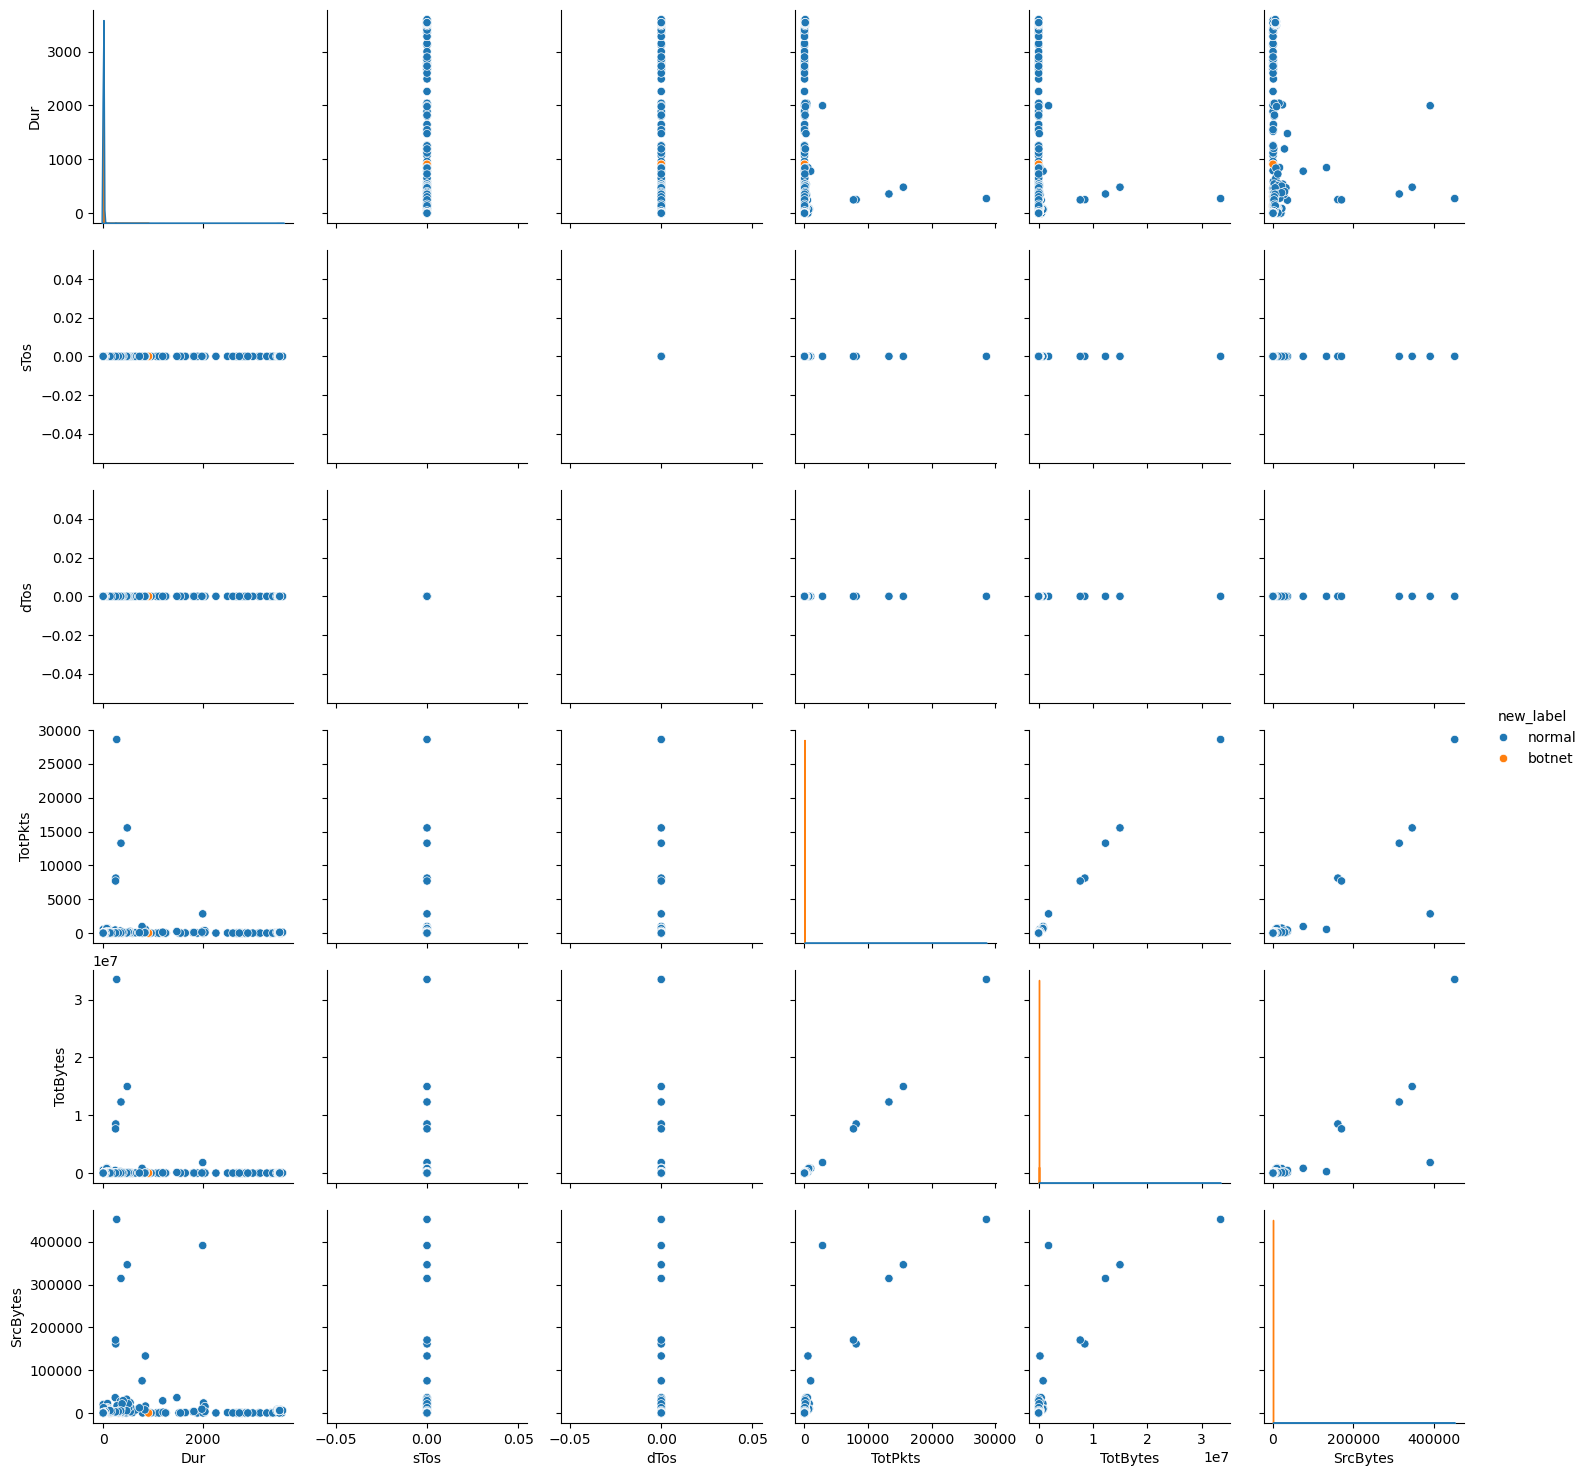

In [54]:
sns.pairplot(filtered_df, hue = 'new_label',
             vars = ['Dur', 'sTos', 'dTos', 'TotPkts', 'TotBytes', 'SrcBytes'])

# !---------------- 3. Data Pre-processing and Validation ---------------------!

"""

 - The data pre-processing step includes: conversion of categorical columns into numerical values which is in our case is "new_label".

 - After that we have applied train_test_split to split the dataset into training and testing data. We have splitted the dataset 
into 80% for training and 20% for testing. 
 - After that we have used standard scaler to stenderdise or normalise our numerical data. This step is mendatory to ensure that our data is on one scale. This is step is used while model training.

"""

In [15]:
cesnet_tls22_df.head()

,ID,BYTES,BYTES_REV,PACKETS,PACKETS_REV,DURATION,PPI,PPI_LEN,PPI_DURATION,PPI_ROUNDTRIPS,...,FLAG_ACK,FLAG_ACK_REV,FLAG_PSH,FLAG_PSH_REV,FLAG_RST,FLAG_RST_REV,FLAG_SYN,FLAG_SYN_REV,FLAG_FIN,FLAG_FIN_REV
0,136435926,19504,9425,26,23,2.685075,"[[0, 128, 0, 0, 0, 486, 437, 13, 128, 9, 1, 27...",29,2.373,5,...,1,1,1,1,0,0,1,1,1,1
1,136435927,2891,5522,17,19,65.644875,"[[0, 121, 0, 0, 0, 1, 0, 2, 121, 0, 2, 0, 152,...",15,65.399,3,...,1,1,1,1,0,0,1,1,1,1
2,136435928,2586,4577,13,13,0.243655,"[[0, 27, 0, 0, 11, 26, 0, 13, 1, 0, 0, 26, 65,...",14,0.204,3,...,1,1,1,1,1,0,1,1,1,1
3,136435929,1567,2232,12,13,0.125484,"[[0, 1, 13, 27, 0, 5, 1, 1, 5, 43, 0], [1, -1,...",11,0.096,4,...,1,1,1,1,1,0,1,1,0,1
4,136435930,1940,1585,7,6,0.194700,"[[0, 21, 2, 75, 24, 0, 0], [1, -1, 1, 1, -1, -...",7,0.122,2,...,1,1,1,1,0,0,1,1,0,0


# excluding extra columns from the dataset

In [57]:
cesnet_tls22_df = cesnet_tls22_df.drop(['ID'], 
                              axis=1)

cesnet_tls22_df

,BYTES,BYTES_REV,PACKETS,PACKETS_REV,DURATION,PPI,PPI_LEN,PPI_DURATION,PPI_ROUNDTRIPS,APP,...,FLAG_ACK,FLAG_ACK_REV,FLAG_PSH,FLAG_PSH_REV,FLAG_RST,FLAG_RST_REV,FLAG_SYN,FLAG_SYN_REV,FLAG_FIN,FLAG_FIN_REV
0,19504,9425,26,23,2.685075,"[[0, 128, 0, 0, 0, 486, 437, 13, 128, 9, 1, 27...",29,2.373,5,microsoft-diagnostic,...,1,1,1,1,0,0,1,1,1,1
1,2891,5522,17,19,65.644875,"[[0, 121, 0, 0, 0, 1, 0, 2, 121, 0, 2, 0, 152,...",15,65.399,3,adobe-notifications,...,1,1,1,1,0,0,1,1,1,1
2,2586,4577,13,13,0.243655,"[[0, 27, 0, 0, 11, 26, 0, 13, 1, 0, 0, 26, 65,...",14,0.204,3,microsoft-settings,...,1,1,1,1,1,0,1,1,1,1
3,1567,2232,12,13,0.125484,"[[0, 1, 13, 27, 0, 5, 1, 1, 5, 43, 0], [1, -1,...",11,0.096,4,mapscz,...,1,1,1,1,1,0,1,1,0,1
4,1940,1585,7,6,0.194700,"[[0, 21, 2, 75, 24, 0, 0], [1, -1, 1, 1, -1, -...",7,0.122,2,skype,...,1,1,1,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5284739,1249,7224,8,11,0.197198,"[[0, 0, 0, 0, 1, 10, 9, 0, 9, 105], [1, -1, -1...",10,0.134,3,microsoft-update,...,1,1,1,1,0,0,1,1,0,0
5284740,25420,3221,39,31,20.055317,"[[0, 1, 5, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",30,0.016,4,tiktok,...,1,1,1,1,0,0,1,1,1,1
5284741,1221,8603,11,9,0.165922,"[[0, 18, 0, 0, 0, 54, 0, 23, 3], [1, -1, -1, -...",9,0.098,2,youtube,...,1,1,1,1,0,0,1,1,0,0
5284742,2250,4282,8,9,0.655006,"[[0, 106, 0, 0, 13, 105, 4, 152, 106], [1, -1,...",9,0.486,3,bitdefender-gravityzone,...,1,1,1,1,0,0,1,1,0,0


In [59]:
cesnet_tls22_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5284744 entries, 0 to 5284743
Data columns (total 29 columns):
 #   Column          Dtype  
---  ------          -----  
 0   BYTES           int64  
 1   BYTES_REV       int64  
 2   PACKETS         int64  
 3   PACKETS_REV     int64  
 4   DURATION        float64
 5   PPI             object 
 6   PPI_LEN         int64  
 7   PPI_DURATION    float64
 8   PPI_ROUNDTRIPS  int64  
 9   APP             object 
 10  CATEGORY        object 
 11  TCP_FLAGS       int64  
 12  TCP_FLAGS_REV   int64  
 13  FLAG_CWR        int64  
 14  FLAG_CWR_REV    int64  
 15  FLAG_ECE        int64  
 16  FLAG_ECE_REV    int64  
 17  FLAG_URG        int64  
 18  FLAG_URG_REV    int64  
 19  FLAG_ACK        int64  
 20  FLAG_ACK_REV    int64  
 21  FLAG_PSH        int64  
 22  FLAG_PSH_REV    int64  
 23  FLAG_RST        int64  
 24  FLAG_RST_REV    int64  
 25  FLAG_SYN        int64  
 26  FLAG_SYN_REV    int64  
 27  FLAG_FIN        int64  
 28  FLAG_FIN_REV

# Converting categorical variables into encoded variables

In [61]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Assuming df is your dataframe and these are the remaining categorical columns
categorical_columns = ['APP', 'PPI']

encoded_df = pd.DataFrame()
encoded_df = cesnet_tls22_df

# Apply Label Encoding for ordinal columns
label_encoder = LabelEncoder()

encoded_df[categorical_columns[0]] = label_encoder.fit_transform(encoded_df[categorical_columns[0]])
encoded_df[categorical_columns[1]] = label_encoder.fit_transform(encoded_df[categorical_columns[1]])


encoded_df

,BYTES,BYTES_REV,PACKETS,PACKETS_REV,DURATION,PPI,PPI_LEN,PPI_DURATION,PPI_ROUNDTRIPS,APP,...,FLAG_ACK,FLAG_ACK_REV,FLAG_PSH,FLAG_PSH_REV,FLAG_RST,FLAG_RST_REV,FLAG_SYN,FLAG_SYN_REV,FLAG_FIN,FLAG_FIN_REV
0,19504,9425,26,23,2.685075,1281686,29,2.373,5,105,...,1,1,1,1,0,0,1,1,1,1
1,2891,5522,17,19,65.644875,1158355,15,65.399,3,6,...,1,1,1,1,0,0,1,1,1,1
2,2586,4577,13,13,0.243655,3442770,14,0.204,3,109,...,1,1,1,1,1,0,1,1,1,1
3,1567,2232,12,13,0.125484,633871,11,0.096,4,99,...,1,1,1,1,1,0,1,1,0,1
4,1940,1585,7,6,0.194700,3074066,7,0.122,2,145,...,1,1,1,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5284739,1249,7224,8,11,0.197198,11655,10,0.134,3,110,...,1,1,1,1,0,0,1,1,0,0
5284740,25420,3221,39,31,20.055317,765077,30,0.016,4,159,...,1,1,1,1,0,0,1,1,1,1
5284741,1221,8603,11,9,0.165922,2176405,9,0.098,2,183,...,1,1,1,1,0,0,1,1,0,0
5284742,2250,4282,8,9,0.655006,995735,9,0.486,3,30,...,1,1,1,1,0,0,1,1,0,0


In [63]:
cesnet_tls22_df.APP.value_counts()

APP
105    255045
109    245503
110    204789
103    161638
155    147452
        ...  
125        18
7           7
127         3
126         3
124         2
Name: count, Length: 186, dtype: int64

In [65]:
cesnet_tls22_df.PPI.value_counts()

PPI
515699     3528
4414475    2684
515698     1819
515700     1817
4536255    1810
           ... 
1530840       1
3796886       1
2893782       1
1854774       1
4656557       1
Name: count, Length: 4834871, dtype: int64

# converting target column new_label into numerical labels

In [67]:
encoded_df['CATEGORY'] = label_encoder.fit_transform(encoded_df['CATEGORY'])

encoded_df

,BYTES,BYTES_REV,PACKETS,PACKETS_REV,DURATION,PPI,PPI_LEN,PPI_DURATION,PPI_ROUNDTRIPS,APP,...,FLAG_ACK,FLAG_ACK_REV,FLAG_PSH,FLAG_PSH_REV,FLAG_RST,FLAG_RST_REV,FLAG_SYN,FLAG_SYN_REV,FLAG_FIN,FLAG_FIN_REV
0,19504,9425,26,23,2.685075,1281686,29,2.373,5,105,...,1,1,1,1,0,0,1,1,1,1
1,2891,5522,17,19,65.644875,1158355,15,65.399,3,6,...,1,1,1,1,0,0,1,1,1,1
2,2586,4577,13,13,0.243655,3442770,14,0.204,3,109,...,1,1,1,1,1,0,1,1,1,1
3,1567,2232,12,13,0.125484,633871,11,0.096,4,99,...,1,1,1,1,1,0,1,1,0,1
4,1940,1585,7,6,0.194700,3074066,7,0.122,2,145,...,1,1,1,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5284739,1249,7224,8,11,0.197198,11655,10,0.134,3,110,...,1,1,1,1,0,0,1,1,0,0
5284740,25420,3221,39,31,20.055317,765077,30,0.016,4,159,...,1,1,1,1,0,0,1,1,1,1
5284741,1221,8603,11,9,0.165922,2176405,9,0.098,2,183,...,1,1,1,1,0,0,1,1,0,0
5284742,2250,4282,8,9,0.655006,995735,9,0.486,3,30,...,1,1,1,1,0,0,1,1,0,0


In [71]:
encoded_df.CATEGORY.value_counts()

CATEGORY
12    641502
17    597000
1     592770
2     555531
0     418292
4     315284
3     313455
18    287554
15    248883
14    221924
16    216542
9     181142
5     146690
6     142818
10    140542
11     96515
7      80399
20     53839
13     16836
8      14953
19      2273
Name: count, dtype: int64

# Balancing the dataset by taking only 10k sample from the target variable - 'new_label'

In [73]:
min_sample = 2273


balanced_df = encoded_df.groupby('CATEGORY').apply(lambda x: x.sample(min_sample)).reset_index(drop=True)

balanced_df

C:\Users\pc\AppData\Local\Temp\ipykernel_8352\1057962422.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = encoded_df.groupby('CATEGORY').apply(lambda x: x.sample(min_sample)).reset_index(drop=True)


,BYTES,BYTES_REV,PACKETS,PACKETS_REV,DURATION,PPI,PPI_LEN,PPI_DURATION,PPI_ROUNDTRIPS,APP,...,FLAG_ACK,FLAG_ACK_REV,FLAG_PSH,FLAG_PSH_REV,FLAG_RST,FLAG_RST_REV,FLAG_SYN,FLAG_SYN_REV,FLAG_FIN,FLAG_FIN_REV
0,913,5249,8,8,0.053809,3002206,7,0.037,2,77,...,1,1,1,1,1,0,1,1,1,1
1,2757,6282,23,14,0.106223,2101632,18,0.061,3,77,...,1,1,1,1,0,0,1,1,1,1
2,3324,3090,12,12,0.584619,721751,10,0.578,3,143,...,1,1,1,1,1,0,1,1,1,1
3,5388,1191,12,14,2.510769,2440575,10,0.076,3,130,...,1,1,1,1,0,0,1,1,1,1
4,740,328,4,4,0.115126,3256920,3,0.026,1,25,...,1,1,1,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47728,1172,748,9,7,0.016696,2812635,6,0.008,2,39,...,1,1,1,1,1,0,1,1,1,1
47729,1622,12738,9,16,0.014820,2800794,17,0.009,3,39,...,1,1,1,1,0,0,1,1,1,1
47730,1305,5411,10,11,0.035629,2673149,12,0.025,3,39,...,1,1,1,1,1,1,1,1,0,1
47731,8968,65071,58,84,21.126436,487112,30,0.484,6,157,...,1,1,1,1,0,1,1,1,1,1


In [74]:
balanced_df.CATEGORY.value_counts()

CATEGORY
0     2273
11    2273
19    2273
18    2273
17    2273
16    2273
15    2273
14    2273
13    2273
12    2273
10    2273
1     2273
9     2273
8     2273
7     2273
6     2273
5     2273
4     2273
3     2273
2     2273
20    2273
Name: count, dtype: int64

# !-------------------- 4 - feature extractrion and data split ----------------!

In [77]:
# Define X (features) and y (target)
X = balanced_df.drop('CATEGORY', axis=1)  # Drop the new_label column to get the features
y = balanced_df['CATEGORY']  # Target variable 'new_label'


# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standerdizing feature

In [79]:
# Standerdizing feature for Supervised Learning phase
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Standerdizing feature for UN-Supervised Learning phase
X_scaled_USP = scaler.transform(X)

# Train a RandomForestClassifier model to get relevent features

In [81]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


# Get feature importances
importances = model.feature_importances_

print(importances)

[9.31406505e-02 1.12570988e-01 4.65578047e-02 6.34915923e-02
 7.90920601e-02 9.74865145e-02 5.41290200e-02 7.23520927e-02
 4.11633570e-02 2.66520110e-01 1.99740483e-02 1.38961194e-02
 2.24018381e-03 1.52707076e-04 2.09066438e-03 1.38831613e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.19843290e-05 1.10466571e-02 6.14843902e-03
 2.85771217e-05 4.14979591e-05 6.26734423e-03 1.02092716e-02]


# Create a DataFrame to display feature importances alongside their column names

Feature Importance:
            Feature  Importance
9              APP    0.266520
1        BYTES_REV    0.112571
5              PPI    0.097487
0            BYTES    0.093141
4         DURATION    0.079092
7     PPI_DURATION    0.072352
3      PACKETS_REV    0.063492
6          PPI_LEN    0.054129
2          PACKETS    0.046558
8   PPI_ROUNDTRIPS    0.041163
10       TCP_FLAGS    0.019974
11   TCP_FLAGS_REV    0.013896
22        FLAG_RST    0.011047
27    FLAG_FIN_REV    0.010209
26        FLAG_FIN    0.006267
23    FLAG_RST_REV    0.006148
12        FLAG_CWR    0.002240
14        FLAG_ECE    0.002091
15    FLAG_ECE_REV    0.001388
13    FLAG_CWR_REV    0.000153
25    FLAG_SYN_REV    0.000041
24        FLAG_SYN    0.000029
21    FLAG_PSH_REV    0.000012
16        FLAG_URG    0.000000
17    FLAG_URG_REV    0.000000
18        FLAG_ACK    0.000000
19    FLAG_ACK_REV    0.000000
20        FLAG_PSH    0.000000


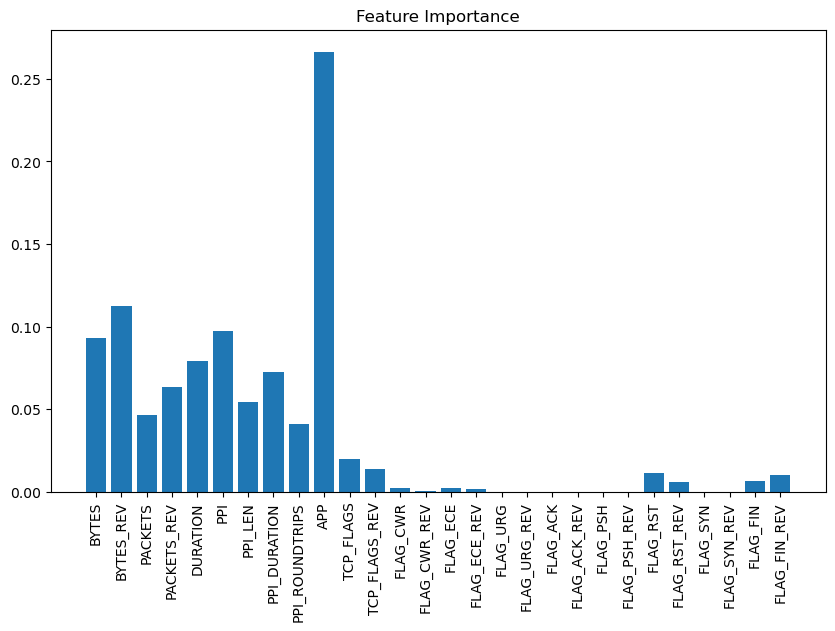

In [83]:
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})


# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importance:\n", feature_importance_df)


# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(X.columns, importances)
plt.xticks(rotation=90)
plt.title('Feature Importance')
plt.show()

# Select features and creating new X dataset by selecting columns as per the feature importance

In [85]:
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(model, threshold="median", prefit=True)  # Only features with importance above mean are kept
X_selected = selector.transform(X)  # This will give the transformed dataset with selected features

# Get the selected feature names
selected_features = X.columns[selector.get_support()]

print("Selected Features:\n", selected_features)

Selected Features:
 Index(['BYTES', 'BYTES_REV', 'PACKETS', 'PACKETS_REV', 'DURATION', 'PPI',
       'PPI_LEN', 'PPI_DURATION', 'PPI_ROUNDTRIPS', 'APP', 'TCP_FLAGS',
       'TCP_FLAGS_REV', 'FLAG_RST', 'FLAG_FIN_REV'],
      dtype='object')


C:\Users\pc\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [87]:
X_sel_features = X[selected_features]

X_sel_features

,BYTES,BYTES_REV,PACKETS,PACKETS_REV,DURATION,PPI,PPI_LEN,PPI_DURATION,PPI_ROUNDTRIPS,APP,TCP_FLAGS,TCP_FLAGS_REV,FLAG_RST,FLAG_FIN_REV
0,913,5249,8,8,0.053809,3002206,7,0.037,2,77,31,27,1,1
1,2757,6282,23,14,0.106223,2101632,18,0.061,3,77,219,91,0,1
2,3324,3090,12,12,0.584619,721751,10,0.578,3,143,31,27,1,1
3,5388,1191,12,14,2.510769,2440575,10,0.076,3,130,27,27,0,1
4,740,328,4,4,0.115126,3256920,3,0.026,1,25,26,26,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47728,1172,748,9,7,0.016696,2812635,6,0.008,2,39,31,27,1,1
47729,1622,12738,9,16,0.014820,2800794,17,0.009,3,39,27,27,0,1
47730,1305,5411,10,11,0.035629,2673149,12,0.025,3,39,30,31,1,1
47731,8968,65071,58,84,21.126436,487112,30,0.484,6,157,27,31,0,1


# Splitting the dataset for selected features and doing Scaling of selected features

In [89]:
# Split data into training and test sets
X_train_sel_features, X_test_sel_features, y_train_sel_features, y_test_sel_features = train_test_split(
    X_sel_features, y, test_size=0.2, random_state=42
)

In [91]:
X_train

,BYTES,BYTES_REV,PACKETS,PACKETS_REV,DURATION,PPI,PPI_LEN,PPI_DURATION,PPI_ROUNDTRIPS,APP,...,FLAG_ACK,FLAG_ACK_REV,FLAG_PSH,FLAG_PSH_REV,FLAG_RST,FLAG_RST_REV,FLAG_SYN,FLAG_SYN_REV,FLAG_FIN,FLAG_FIN_REV
22558,5026,6804,14,13,0.798808,4500342,15,0.779,3,128,...,1,1,1,1,0,0,1,1,1,1
8410,10266,19868,25,21,1.009726,3738574,25,0.950,5,103,...,1,1,1,1,0,0,1,1,0,0
42789,3728,6984,13,13,0.165550,3981683,16,0.071,3,155,...,1,1,1,1,0,0,1,1,0,0
31942,1175,7923,12,12,3.653827,2617248,9,0.450,2,29,...,1,1,1,1,0,1,1,1,1,0
12283,6912,1303,17,13,0.255192,4026147,10,0.124,2,96,...,1,1,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,1281,5721,10,13,0.358708,3244225,11,0.325,4,53,...,1,1,1,1,1,1,1,1,1,0
44732,1930,7573,16,15,0.392662,32935,14,0.378,3,16,...,1,1,1,1,0,0,1,1,0,0
38158,2079,40152,28,43,32.117010,2694646,30,12.088,9,8,...,1,1,1,1,0,0,1,1,1,1
860,1504,9374,14,15,0.030849,95380,17,0.027,3,131,...,1,1,1,1,0,0,1,1,1,1


In [93]:
X_train_sel_features

,BYTES,BYTES_REV,PACKETS,PACKETS_REV,DURATION,PPI,PPI_LEN,PPI_DURATION,PPI_ROUNDTRIPS,APP,TCP_FLAGS,TCP_FLAGS_REV,FLAG_RST,FLAG_FIN_REV
22558,5026,6804,14,13,0.798808,4500342,15,0.779,3,128,27,27,0,1
8410,10266,19868,25,21,1.009726,3738574,25,0.950,5,103,26,26,0,0
42789,3728,6984,13,13,0.165550,3981683,16,0.071,3,155,26,26,0,0
31942,1175,7923,12,12,3.653827,2617248,9,0.450,2,29,27,30,0,0
12283,6912,1303,17,13,0.255192,4026147,10,0.124,2,96,31,27,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,1281,5721,10,13,0.358708,3244225,11,0.325,4,53,31,30,1,0
44732,1930,7573,16,15,0.392662,32935,14,0.378,3,16,26,26,0,0
38158,2079,40152,28,43,32.117010,2694646,30,12.088,9,8,27,27,0,1
860,1504,9374,14,15,0.030849,95380,17,0.027,3,131,27,27,0,1


In [95]:
y_train

22558     9
8410      3
42789    18
31942    14
12283     5
         ..
11284     4
44732    19
38158    16
860       0
15795     6
Name: CATEGORY, Length: 38186, dtype: int32

In [97]:
# Standerdizing feature for Supervised Learning phase
scaler_sel_features = StandardScaler()

X_train_scaled_sel_features = scaler_sel_features.fit_transform(X_train_sel_features)
X_test_scaled_sel_features = scaler_sel_features.transform(X_test_sel_features)

# Standerdizing feature for UN-Supervised Learning phase
X_scaled_USP_sel_features = scaler_sel_features.transform(X_sel_features)

# ! -------- 5 - Un-Supervised Learning Phase -- Clustering and PCA -------------!
# Also Calculating silhouette score and Doing Visualisation

# Before feature importance

In [99]:
# Doing Clustering using K-means
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled_USP)

# Using PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_USP)

# Silhouette Score
silhouette_kmeans = silhouette_score(X_scaled_USP, kmeans_labels)
print(f'Silhouette Score - K-means: {silhouette_kmeans}')

# Visualizing the clusters in reduced dimensionality using PCA
# K-means
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='viridis', legend='full')
plt.title('K-means Clustering')


KeyboardInterrupt



# After feature importance

Silhouette Score - K-means: 0.9090785295946178


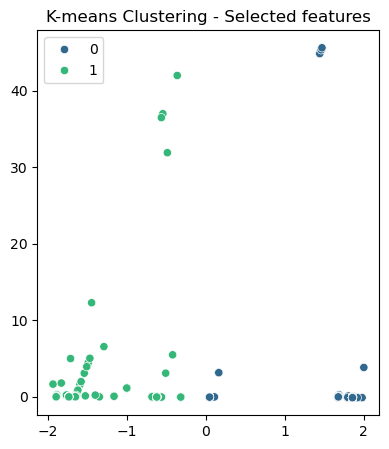

In [165]:
# Doing Clustering using K-means
kmeans_sel_features = KMeans(n_clusters=2, random_state=42)
kmeans_labels_sel_features = kmeans.fit_predict(X_scaled_USP_sel_features)

# Using PCA for dimensionality reduction
pca_sel_features = PCA(n_components=2)
X_pca_sel_features = pca_sel_features.fit_transform(X_scaled_USP_sel_features)

# Silhouette Score
silhouette_kmeans_sel_features = silhouette_score(X_scaled_USP_sel_features, kmeans_labels_sel_features)
print(f'Silhouette Score - K-means: {silhouette_kmeans_sel_features}')

# Visualizing the clusters in reduced dimensionality using PCA
# K-means
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x=X_pca_sel_features[:, 0], y=X_pca_sel_features[:, 1], hue=kmeans_labels_sel_features, palette='viridis', legend='full')
plt.title('K-means Clustering - Selected features')



# # Clustering using Agglomerative Hierarchical Clustering
# hierarchical = AgglomerativeClustering(n_clusters=4)
# hierarchical_labels = hierarchical.fit_predict(X_scaled_USP)

# # Clustering using DBScan
# dbscan = DBSCAN(eps=1.5, min_samples=5)
# dbscan_labels = dbscan.fit_predict(X_scaled_USP)


# # Hierarchical
# plt.subplot(1, 3, 2)
# sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=hierarchical_labels, palette='viridis', legend='full')
# plt.title('Hierarchical Clustering')

# # DBScan
# plt.subplot(1, 3, 3)
# sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=dbscan_labels, palette='viridis', legend='full')
# plt.title('DBScan Clustering')

plt.show()

# !-------------- 6. Supervised Model Training and Validation ------------------!

"""

We have taken 4 models: Random Forest Classifier, Logistic Regression, Support Vector Machine Classifier, Naive Bayes Classifier to get the best accuracy out of these 4 models. 

"""

# Before feature importance

In [101]:
# Random Forest Classifier
RF_model = RandomForestClassifier(random_state=42)
RF_model.fit(X_train_scaled, y_train)
RF_model_pred = RF_model.predict(X_test_scaled)


# Logistic Regression Model
LR_model = LogisticRegression(random_state=42)
LR_model.fit(X_train_scaled, y_train)
LR_model_pred = LR_model.predict(X_test_scaled)


# Support Vector Machine Classifier
SVC_model = SVC(random_state=42)
SVC_model.fit(X_train_scaled, y_train)
SVC_model_pred = SVC_model.predict(X_test_scaled)


# Naive Bayes Classifier
NB_model = GaussianNB()
NB_model.fit(X_train_scaled, y_train)
NB_model_pred = NB_model.predict(X_test_scaled)

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [102]:
print("Random Forest: " + f"{RF_model_pred[0]}")
print("Logistic Regression: " + f"{LR_model_pred[0]}")
print("SVC: " + f"{SVC_model_pred[0]}")
print("NB: " + f"{NB_model_pred[0]}")

Random Forest: 20
Logistic Regression: 10
SVC: 7
NB: 14


# After feature importance

In [103]:
# Random Forest Classifier
RF_model_sf = RandomForestClassifier(random_state=42)
RF_model_sf.fit(X_train_scaled_sel_features, y_train)
RF_model_pred_sf = RF_model_sf.predict(X_test_scaled_sel_features)


# Logistic Regression Model
LR_model_sf = LogisticRegression(random_state=42)
LR_model_sf.fit(X_train_scaled_sel_features, y_train)
LR_model_pred_sf = LR_model_sf.predict(X_test_scaled_sel_features)


# Support Vector Machine Classifier
SVC_model_sf = SVC(random_state=42)
SVC_model_sf.fit(X_train_scaled_sel_features, y_train)
SVC_model_pred_sf = SVC_model_sf.predict(X_test_scaled_sel_features)


# Naive Bayes Classifier
NB_model_sf = GaussianNB()
NB_model_sf.fit(X_train_scaled_sel_features, y_train)
NB_model_pred_sf = NB_model_sf.predict(X_test_scaled_sel_features)

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [104]:
print("Random Forest: " + f"{RF_model_pred_sf[0]}")
print("Logistic Regression: " + f"{LR_model_pred_sf[0]}")
print("SVC: " + f"{SVC_model_pred_sf[0]}")
print("NB: " + f"{NB_model_pred_sf[0]}")

Random Forest: 20
Logistic Regression: 10
SVC: 20
NB: 0


# !--------------- 7 Model Evaluation ------------------!

# Before feature selection

In [109]:
# Accuracy score for our three models
RF_accuracy = accuracy_score(y_test, RF_model_pred)
LR_accuracy = accuracy_score(y_test, LR_model_pred)
SVC_accuracy = accuracy_score(y_test, SVC_model_pred)
NB_accuracy = accuracy_score(y_test, NB_model_pred)


# Confusion metrix and classification report for out three models
RF_conf_matrix = confusion_matrix(y_test, RF_model_pred)
RF_class_rep = classification_report(y_test, RF_model_pred)

LR_conf_matrix = confusion_matrix(y_test, LR_model_pred)
LR_class_rep = classification_report(y_test, LR_model_pred)

SVC_conf_matrix = confusion_matrix(y_test, SVC_model_pred)
SVC_class_rep = classification_report(y_test, SVC_model_pred)

NB_conf_matrix = confusion_matrix(y_test, NB_model_pred)
NB_class_rep = classification_report(y_test, NB_model_pred)

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# After feature selection

In [111]:
# Accuracy score for our three models
RF_accuracy_sf = accuracy_score(y_test, RF_model_pred_sf)
LR_accuracy_sf = accuracy_score(y_test, LR_model_pred_sf)
SVC_accuracy_sf = accuracy_score(y_test, SVC_model_pred_sf)
NB_accuracy_sf = accuracy_score(y_test, NB_model_pred_sf)


# Confusion metrix and classification report for out three models
RF_conf_matrix_sf = confusion_matrix(y_test, RF_model_pred_sf)
RF_class_rep_sf = classification_report(y_test, RF_model_pred_sf)

LR_conf_matrix_sf = confusion_matrix(y_test, LR_model_pred_sf)
LR_class_rep_sf = classification_report(y_test, LR_model_pred_sf)

SVC_conf_matrix_sf = confusion_matrix(y_test, SVC_model_pred_sf)
SVC_class_rep_sf = classification_report(y_test, SVC_model_pred_sf)

NB_conf_matrix_sf = confusion_matrix(y_test, NB_model_pred_sf)
NB_class_rep_sf = classification_report(y_test, NB_model_pred_sf)

# !---------------- 8. Output and highlight of the best model -------------------!

"""

Evaluating the best output result(Accuracy Score) from our 3 models by creating a sample dataframe which has a model names and the Score of each model. 

We have got the result by checking the max value of accuracy of the model

After that we have plotted prediction on test and training data with respect to the original values. 

"""

# Before feature selection

In [113]:
results = pd.DataFrame({
    'Model': ['Random Forest', 'Logistic Regression', 'SVC', 'NB'],
    'AUC (Accuracy Score)': [RF_accuracy, LR_accuracy, SVC_accuracy, NB_accuracy]
})

best_model = results.loc[results['AUC (Accuracy Score)'].idxmax()]

# Printing the results
print("Results before feature selection:\n", results)
print("\nBest Model:\n", best_model)

Results before feature selection:
                  Model  AUC (Accuracy Score)
0        Random Forest              0.931392
1  Logistic Regression              0.347229
2                  SVC              0.564575
3                   NB              0.185503

Best Model:
 Model                   Random Forest
AUC (Accuracy Score)         0.931392
Name: 0, dtype: object


# After feature selection

In [115]:
results_sf = pd.DataFrame({
    'Model': ['Random Forest', 'Logistic Regression', 'SVC', 'NB'],
    'AUC (Accuracy Score)': [RF_accuracy_sf, LR_accuracy_sf, SVC_accuracy_sf, NB_accuracy_sf]
})

best_model_sf = results_sf.loc[results_sf['AUC (Accuracy Score)'].idxmax()]

# Printing the results
print("Results after feature selection:\n", results_sf)
print("\nBest Model:\n", best_model_sf)

Results after feature selection:
                  Model  AUC (Accuracy Score)
0        Random Forest              0.947313
1  Logistic Regression              0.333613
2                  SVC              0.578297
3                   NB              0.240494

Best Model:
 Model                   Random Forest
AUC (Accuracy Score)         0.947313
Name: 0, dtype: object


# Scatter plot to visualise the prediction on test data of the best model which is in our case is Random Forest Classifier

# Scatter Plot

In [117]:
print(y_test[:5])
print(RF_model_pred[:5])

46558    20
29950    13
35608    15
16431     7
2116      0
Name: CATEGORY, dtype: int32
[20 13 15  7  0]


# Confusion Metrix and Classification report of out best model - Random Forest

In [121]:
print(f'Random Forest Model')
print(f'Accuracy: {RF_accuracy}')
print(f'Classification Report:\n{RF_class_rep}')
print('-' * 50)

Random Forest Model
Accuracy: 0.931392060333089
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       456
           1       0.99      0.92      0.96       474
           2       0.94      0.94      0.94       454
           3       0.96      0.93      0.94       458
           4       0.92      0.90      0.91       430
           5       0.94      0.89      0.92       437
           6       0.90      0.93      0.91       435
           7       0.88      0.92      0.90       453
           8       0.94      0.97      0.95       463
           9       0.95      0.96      0.95       431
          10       0.95      0.96      0.95       449
          11       0.98      0.98      0.98       491
          12       0.88      0.81      0.84       461
          13       0.99      1.00      1.00       484
          14       0.91      0.93      0.92       451
          15       0.82      0.86      0.84       434
          


12    641502
17    597000
1     592770
2     555531
0     418292
4     315284
3     313455
18    287554
15    248883
14    221924
16    216542
9     181142
5     146690
6     142818
10    140542
11     96515
7      80399
20     53839
13     16836
8      14953
19      2273

Other services and APIs    641502
Streaming media            597000
Analytics & Telemetry      592770
Antivirus                  555531
Advertising                418292
File sharing               315284
Authentication services    313455
Videoconferencing          287554
Social                     248883
Search                     221924
Software updates           216542
Mail                       181142
Games                      146690
Information Systems        142818
Music                      140542
Notification services       96515
Instant messaging           80399
Weather services            53839
Remote Desktop              16836
Internet Banking            14953
Virtual assistant            2273

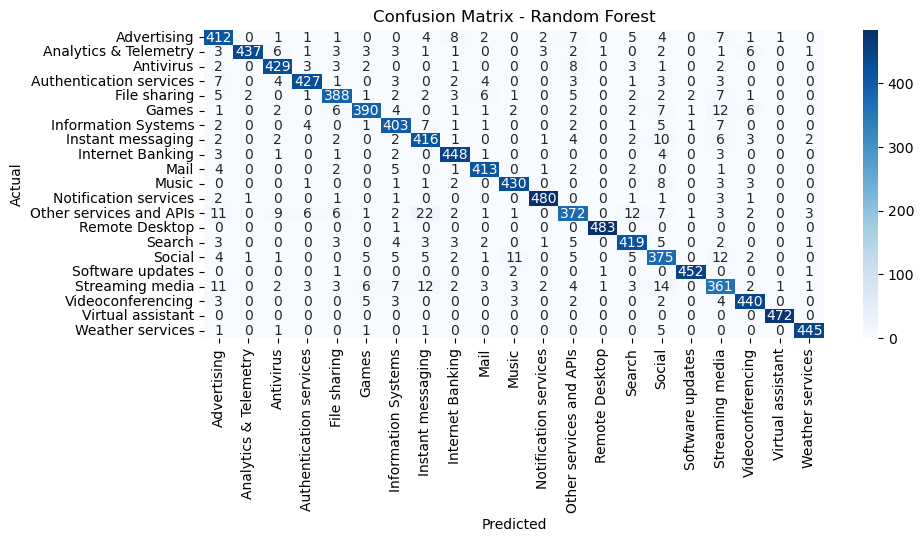

In [136]:
plt.figure(figsize=(10, 4))
sns.heatmap(RF_conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels = ['Advertising', 'Analytics & Telemetry', 'Antivirus', 'Authentication services', 'File sharing', 'Games', 
                         'Information Systems', 'Instant messaging', 'Internet Banking', 'Mail', 'Music', 'Notification services', 
                         'Other services and APIs', 'Remote Desktop', 'Search', 'Social', 'Software updates', 
                         'Streaming media', 'Videoconferencing', 'Virtual assistant', 'Weather services'], 
            
            yticklabels = ['Advertising', 'Analytics & Telemetry', 'Antivirus', 'Authentication services', 'File sharing', 'Games', 
                         'Information Systems', 'Instant messaging', 'Internet Banking', 'Mail', 'Music', 'Notification services', 
                         'Other services and APIs', 'Remote Desktop', 'Search', 'Social', 'Software updates', 
                         'Streaming media', 'Videoconferencing', 'Virtual assistant', 'Weather services'])
plt.title(f'Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion Metrix and Classification report of other three

In [125]:
# Logistic Regression
print(f'Logistic Regression Model')
print(f'Accuracy: {LR_accuracy}')
print(f'Classification Report:\n{LR_class_rep}')
print('-' * 50)

# SVC
print(f'Support Vector Model')
print(f'Accuracy: {SVC_accuracy}')
print(f'Classification Report:\n{SVC_class_rep}')
print('-' * 50)


# NB
print(f'Naive Bayes Model')
print(f'Accuracy: {NB_accuracy}')
print(f'Classification Report:\n{NB_class_rep}')
print('-' * 50)

Logistic Regression Model
Accuracy: 0.3472294961768095
Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.14      0.21       456
           1       0.29      0.68      0.41       474
           2       0.31      0.26      0.28       454
           3       0.37      0.08      0.14       458
           4       0.11      0.05      0.06       430
           5       0.06      0.03      0.04       437
           6       0.33      0.55      0.41       435
           7       0.33      0.40      0.36       453
           8       0.21      0.17      0.19       463
           9       0.34      0.19      0.25       431
          10       0.33      0.33      0.33       449
          11       0.39      0.28      0.33       491
          12       0.38      0.07      0.12       461
          13       0.26      0.40      0.32       484
          14       0.27      0.18      0.22       451
          15       0.38      0.29      0.33       434
   

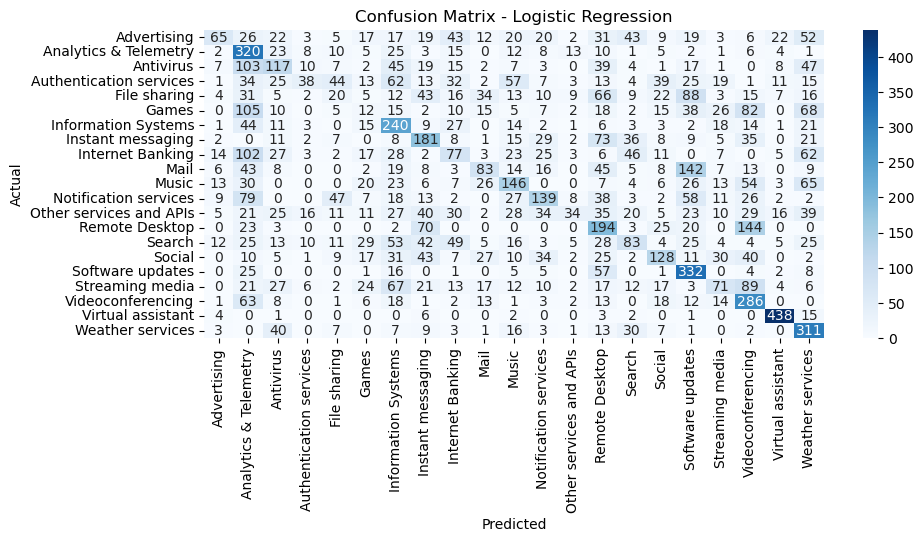

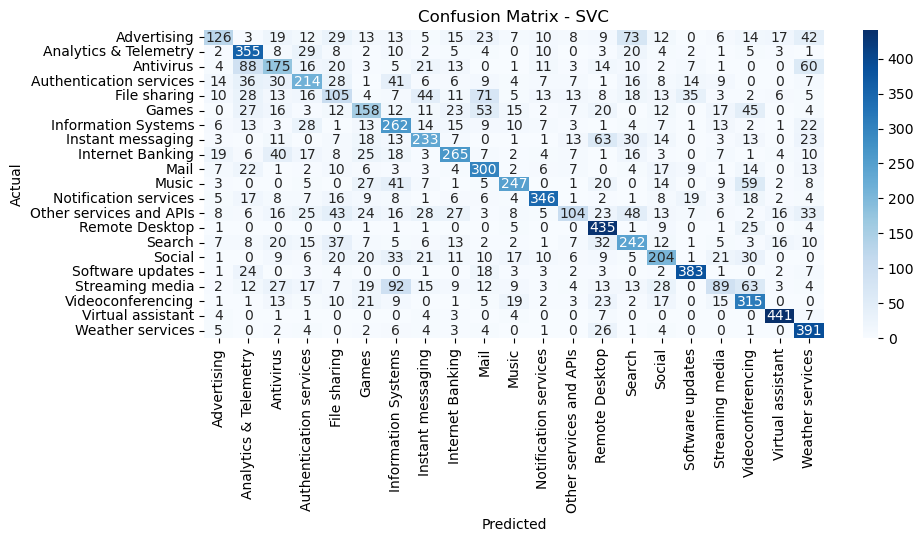

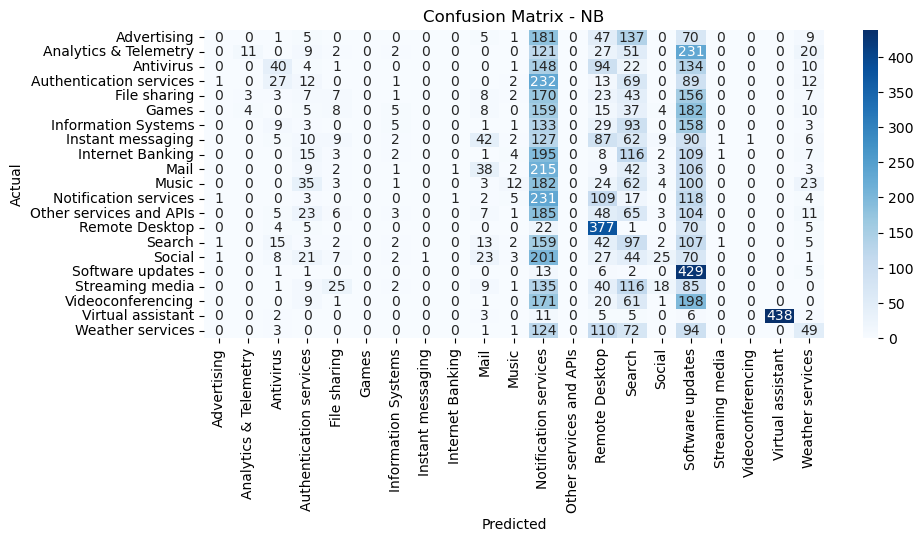

In [138]:
# Logistic Regression
plt.figure(figsize=(10, 4))
sns.heatmap(LR_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels = ['Advertising', 'Analytics & Telemetry', 'Antivirus', 'Authentication services', 'File sharing', 'Games', 
                         'Information Systems', 'Instant messaging', 'Internet Banking', 'Mail', 'Music', 'Notification services', 
                         'Other services and APIs', 'Remote Desktop', 'Search', 'Social', 'Software updates', 
                         'Streaming media', 'Videoconferencing', 'Virtual assistant', 'Weather services'], 
            
            yticklabels = ['Advertising', 'Analytics & Telemetry', 'Antivirus', 'Authentication services', 'File sharing', 'Games', 
                         'Information Systems', 'Instant messaging', 'Internet Banking', 'Mail', 'Music', 'Notification services', 
                         'Other services and APIs', 'Remote Desktop', 'Search', 'Social', 'Software updates', 
                         'Streaming media', 'Videoconferencing', 'Virtual assistant', 'Weather services'])

plt.title(f'Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# SVC
plt.figure(figsize=(10, 4))
sns.heatmap(SVC_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels = ['Advertising', 'Analytics & Telemetry', 'Antivirus', 'Authentication services', 'File sharing', 'Games', 
                         'Information Systems', 'Instant messaging', 'Internet Banking', 'Mail', 'Music', 'Notification services', 
                         'Other services and APIs', 'Remote Desktop', 'Search', 'Social', 'Software updates', 
                         'Streaming media', 'Videoconferencing', 'Virtual assistant', 'Weather services'], 
            
            yticklabels = ['Advertising', 'Analytics & Telemetry', 'Antivirus', 'Authentication services', 'File sharing', 'Games', 
                         'Information Systems', 'Instant messaging', 'Internet Banking', 'Mail', 'Music', 'Notification services', 
                         'Other services and APIs', 'Remote Desktop', 'Search', 'Social', 'Software updates', 
                         'Streaming media', 'Videoconferencing', 'Virtual assistant', 'Weather services'])

plt.title(f'Confusion Matrix - SVC')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# NB
plt.figure(figsize=(10, 4))
sns.heatmap(NB_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels = ['Advertising', 'Analytics & Telemetry', 'Antivirus', 'Authentication services', 'File sharing', 'Games', 
                         'Information Systems', 'Instant messaging', 'Internet Banking', 'Mail', 'Music', 'Notification services', 
                         'Other services and APIs', 'Remote Desktop', 'Search', 'Social', 'Software updates', 
                         'Streaming media', 'Videoconferencing', 'Virtual assistant', 'Weather services'], 
            
            yticklabels = ['Advertising', 'Analytics & Telemetry', 'Antivirus', 'Authentication services', 'File sharing', 'Games', 
                         'Information Systems', 'Instant messaging', 'Internet Banking', 'Mail', 'Music', 'Notification services', 
                         'Other services and APIs', 'Remote Desktop', 'Search', 'Social', 'Software updates', 
                         'Streaming media', 'Videoconferencing', 'Virtual assistant', 'Weather services'])

plt.title(f'Confusion Matrix - NB')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# !------------------------- Model Validation ---------------------------!
 - Calculating Accuracy Score and Plotting Accuracy Curve for each of the model by using Cross validation technique.
 - Reason for doing this is to validate our model performance

In [140]:
from sklearn.model_selection import cross_val_score


models = [RF_model, LR_model, SVC_model, NB_model]

print('!---------------------------------------------------------------')
print('Cross Validation Results before selected features: ')
for model in models:
    scores = cross_val_score(model, X, y, cv=5)
    print(f"Cross-validation scores for model {model} is : {scores}")
    print(f"Mean CV score: {scores.mean()}")



# Selected Features
models_sf = [RF_model_sf, LR_model_sf, SVC_model_sf, NB_model_sf]

print('!---------------------------------------------------------------')
print('Cross Validation Results After selected features: ')
for model in models_sf:
    scores = cross_val_score(model, X_sel_features, y, cv=5)
    print(f"Cross-validation scores for model {model} is : {scores}")
    print(f"Mean CV score: {scores.mean()}")



!---------------------------------------------------------------
Cross Validation Results before selected features: 
Cross-validation scores for model RandomForestClassifier(random_state=42) is : [0.93023987 0.93223002 0.93484864 0.93285146 0.93578462]
Mean CV score: 0.9331909214638723


C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-validation scores for model LogisticRegression(random_state=42) is : [0.05781921 0.05729549 0.06148528 0.06138697 0.05929185]
Mean CV score: 0.059455759480849545
Cross-validation scores for model SVC(random_state=42) is : [0.16717293 0.17220069 0.17366712 0.16666667 0.16813325]
Mean CV score: 0.16956813239585616
Cross-validation scores for model GaussianNB() is : [0.12003771 0.12338955 0.12810307 0.13167819 0.12109784]
Mean CV score: 0.12486127110153653
!---------------------------------------------------------------
Cross Validation Results After selected features: 
Cross-validation scores for model RandomForestClassifier(random_state=42) is : [0.94239028 0.94647533 0.94532314 0.94238424 0.94489839]
Mean CV score: 0.9442942763722943


C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-validation scores for model LogisticRegression(random_state=42) is : [0.06274222 0.06179952 0.05467686 0.06086319 0.06285355]
Mean CV score: 0.06058706853964587
Cross-validation scores for model SVC(random_state=42) is : [0.16801089 0.17241018 0.17387661 0.16666667 0.16781898]
Mean CV score: 0.1697566667151658
Cross-validation scores for model GaussianNB() is : [0.12003771 0.12338955 0.12810307 0.13167819 0.12109784]
Mean CV score: 0.12486127110153653
